In [89]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [90]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()


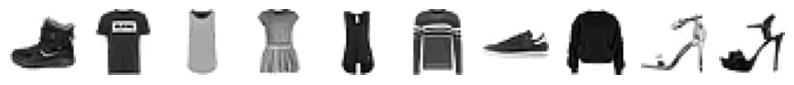

In [91]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r: 현재색반전  0  255
    axs[i].axis('off')                          # 그래프의 눈금을 제거
plt.show() 

In [92]:
train_input
train_input.shape # (60000, 28, 28)

(60000, 28, 28)

In [93]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1, 28*28)   # flatten층에서 사이즈 그대로 적용(28,28)
# train_scaled
# train_scaled.shape # (60000, 784)

In [94]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [95]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# 패션mlist 딥러닝을 구현하시오. ==> 기초


# 변경
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델 구성 확인 model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)


In [97]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid / relu
model.add(keras.layers.Dense(10, activation='softmax')) # 다분류인 경우 softmax

In [98]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# ==> 결과 해석
# dense_1 --> 가중치 100
# dense_2 --> 100개의 모델에서 10개로 가는 것. 100*a + b = 1010 (a=10, b=10)

epochs = 20 : 훈련세트 정확도가 높아짐.
검증세트를 가지고 정확도를 측정

In [99]:
# loss : 손실율
# model.compile(optimizer='adam', loss='sparse_categorical_crossentorpy', metrics=['accuracy']) 
# epochs를 돌때마다 loss, accuracy 값을 저장
# history = model.fit(train_scaled, train_target, epochs=5)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7634 - loss: 0.6818
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8551 - loss: 0.4078
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8731 - loss: 0.3512
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8806 - loss: 0.3272
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8897 - loss: 0.3010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2835
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8992 - loss: 0.2782
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9017 - loss: 0.2636
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9061 - loss: 0.2550
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9072 - loss: 0.2448
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9121 - loss: 0.2371
Epoch 12/20
1500/1500 ━━━━━━━━

In [100]:
# history keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [101]:
history.history['loss']
history.history['accuracy']

[0.8158125281333923,
 0.8587083220481873,
 0.8726666569709778,
 0.8816458582878113,
 0.8873541951179504,
 0.8947916626930237,
 0.8994583487510681,
 0.9006666541099548,
 0.9058125019073486,
 0.9079583287239075,
 0.9117083549499512,
 0.9145416617393494,
 0.9153541922569275,
 0.9185208082199097,
 0.9207708239555359,
 0.9228958487510681,
 0.924916684627533,
 0.9275833368301392,
 0.92947918176651,
 0.9311875104904175]

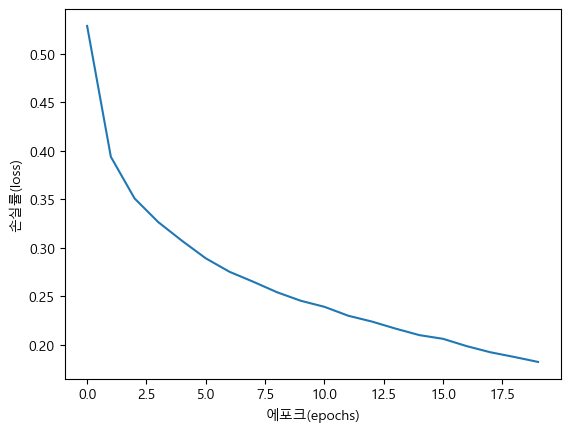

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03', dpi=300) # 파일 저장
plt.show()

In [74]:
# 옵티마이저 : 최적화 알고리즘 찾는 것으로 딥러닝에는 주로 Adam 이용
# learing rate : 경사 따라서 한번 내려갈 때 

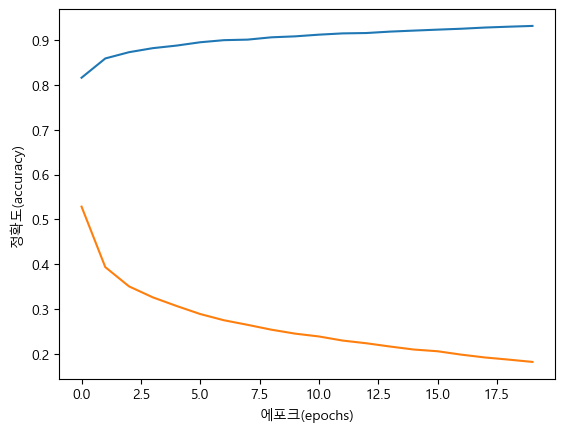

In [103]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03', dpi=300) # 파일 저장
plt.show()

In [ ]:
# 테스트 세트도 함께 검증 : history

In [104]:
model.evaluate(val_scaled,val_target) #test데이터를 가지고 검증

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8838 - loss: 0.3457


[0.34581124782562256, 0.8864166736602783]

In [ ]:
# model.fit - loss, accuracy 정보를 리턴(history)
# 검증세트도 함께 검증 - history 정보로 받을 수 있음

In [105]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss, accuracy 값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9333 - loss: 0.1784 - val_accuracy: 0.8898 - val_loss: 0.3355
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9322 - loss: 0.1778 - val_accuracy: 0.8830 - val_loss: 0.3715
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9336 - loss: 0.1726 - val_accuracy: 0.8873 - val_loss: 0.3643
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9381 - loss: 0.1654 - val_accuracy: 0.8940 - val_loss: 0.3454
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9405 - loss: 0.1594 - val_accuracy: 0.8830 - val_loss: 0.3746
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9398 - loss: 0.1613 - val_accuracy: 0.8898 - val_loss: 0.3652
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9422 - loss: 0.1527 - val_accuracy: 0.8883 - val_loss: 0.3642
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9438 - loss: 0.1490 - 

In [ ]:
# 총 4개 속성 : train 세트 2개(accuracy, loss), test 세트 2개(val_accuracy, val_loss)
history.history.keys()

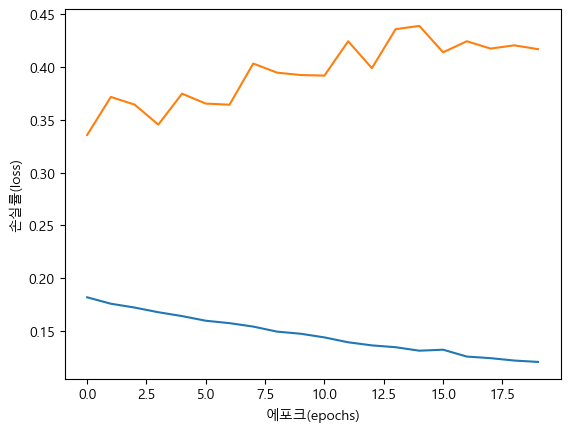

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03', dpi=300) # 파일 저장
plt.show()


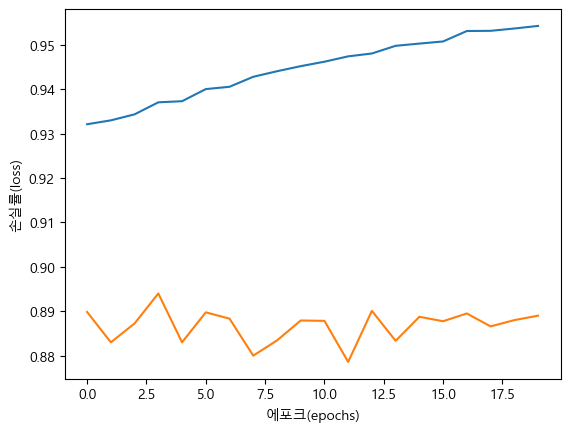

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03', dpi=300) # 파일 저장
plt.show()

In [110]:
# --> 과대적합으로 보임 ==> 과대적합 규제